In [184]:
# 라이브러리

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
# 데이터

df = pd.read_parquet('df.gzip')
df.shape

(27838899, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27838899 entries, 4 to 67501978
Data columns (total 7 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   brand         object             
 4   price         float64            
 5   user_id       int64              
 6   user_session  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 1.7+ GB


In [5]:
# 결측치
df.isnull().sum()

event_time      0
event_type      0
product_id      0
brand           0
price           0
user_id         0
user_session    0
dtype: int64

In [17]:
df.head()

,event_time,event_type,product_id,brand,price,user_id,user_session
4,2019-10-01 00:00:04+00:00,view,1004237,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
9,2019-10-01 00:00:11+00:00,view,1004545,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb
11,2019-10-01 00:00:11+00:00,view,1005011,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
19,2019-10-01 00:00:19+00:00,view,1005135,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
20,2019-10-01 00:00:20+00:00,view,1003306,apple,588.77,555446831,6ec635da-ea15-4a5d-96b4-c8ca9d38f89f


In [222]:
df.tail()

,event_time,event_type,product_id,brand,price,user_id,user_session,hour,date,event_hour
67501950,2019-11-30 23:59:47+00:00,view,1003911,samsung,177.10,578678977,fc4e8bda-1545-4ed3-aec2-df7805c03d0d,23,2019-11-30,23
67501966,2019-11-30 23:59:54+00:00,view,1005174,samsung,591.75,579969525,180a7f1f-ed0c-485a-b145-a980716d6abb,23,2019-11-30,23
67501967,2019-11-30 23:59:54+00:00,view,1005118,apple,925.47,579969045,ee246970-62cb-4105-a049-703cdaee3a26,23,2019-11-30,23
67501976,2019-11-30 23:59:59+00:00,view,1004833,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb,23,2019-11-30,23
67501978,2019-11-30 23:59:59+00:00,view,1004233,apple,1312.52,579969851,90aca71c-ed8a-4670-866a-761ebacb732d,23,2019-11-30,23


In [181]:
df[(df['event_time'].dt.month == 11) & (df[df['event_time'].dt.day == 15]) & ()]

MemoryError: Unable to allocate 377. TiB for an array with shape (27838899, 1860753) and data type float64

# AARRR

* Acquisition: 웹사이트에 유입된 방문자 수

* Activation: 새로운 사용자의 가입 수 또는 앱 설치 수

* Retention: 이전에 가입한 사용자들이 다시 방문한 수

* Revenue: 결제 금액

* Referral: 추천 수

## Acquisition

웹사이트에 유입된 방문자 수

In [85]:
# Acquisition
# 웹사이트에 유입된 방문자 수
acquisition = df['user_id'].nunique()
acquisition

2438160

## Activation
새로운 사용자의 가입 수 또는 앱 설치 수

In [77]:
# view한 유저 수
df.loc[df['event_type'] == 'view', 'user_id'].nunique()

2437591

In [164]:
# 브랜드별 총 view 수
brand_view = pd.DataFrame(df[df['event_type'] == 'view'].value_counts('brand'))
brand_view

,0
brand,
samsung,8079940
apple,7151172
xiaomi,5188618
huawei,2089356
oppo,1203440
meizu,346797
vivo,259682
honor,180558
oneplus,172623


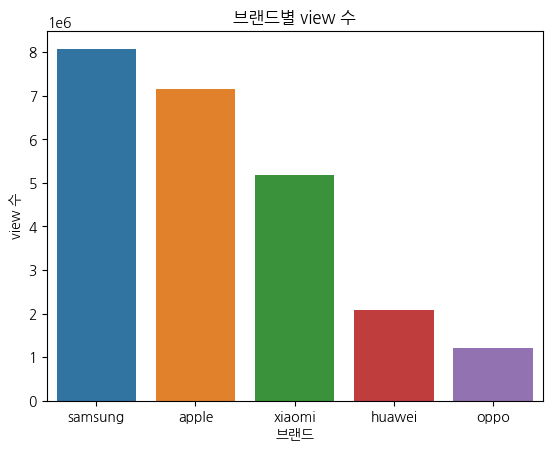

In [188]:
sns.barplot(brand_view.iloc[:5, :].T)
plt.title('브랜드별 view 수')
plt.xlabel('브랜드')
plt.ylabel('view 수')
plt.show()

In [79]:
# cart 한 유저 수
df.loc[df['event_type'] == 'cart', 'user_id'].nunique()

507409

In [171]:
# 브랜드별 총 cart 수
brand_cart = pd.DataFrame(df[df['event_type'] == 'cart'].value_counts('brand'))
brand_cart

,0
brand,
samsung,710273
apple,537804
xiaomi,256386
huawei,106939
oppo,65174
vivo,8911
meizu,6698
nokia,3000
honor,2942


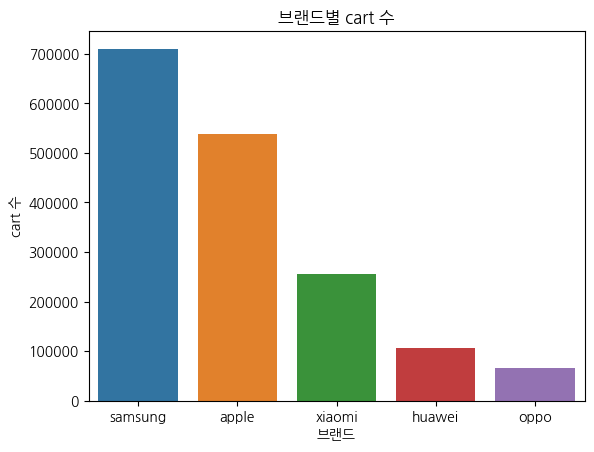

In [189]:
sns.barplot(brand_cart.iloc[:5, :].T)
plt.title('브랜드별 cart 수')
plt.xlabel('브랜드')
plt.ylabel('cart 수')
plt.show()

In [80]:
# purchase한 유저 수
df.loc[df['event_type'] == 'purchase', 'user_id'].nunique()

321917

In [173]:
# 브랜드별 총 purchase 수

brand_purchase = pd.DataFrame(df[df['event_type'] == 'purchase'].value_counts('brand'))
brand_purchase

,0
brand,
samsung,304914
apple,242597
xiaomi,87329
huawei,43518
oppo,25971
vivo,3939
meizu,3770
honor,1254
nokia,1166


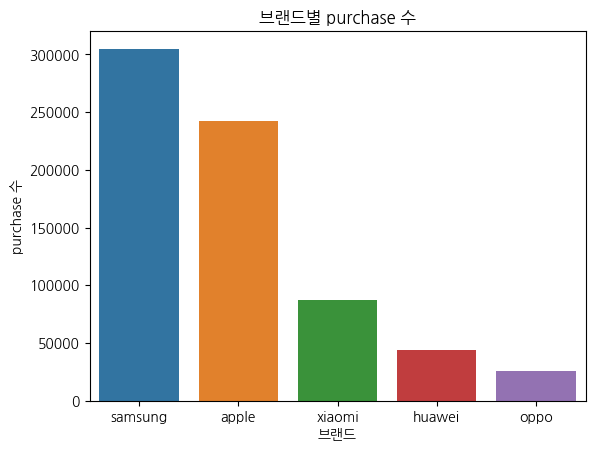

In [190]:
sns.barplot(brand_purchase.iloc[:5, :].T)
plt.title('브랜드별 purchase 수')
plt.xlabel('브랜드')
plt.ylabel('purchase 수')
plt.show()

Text(0.5, 1.0, '시간대별 view 수')

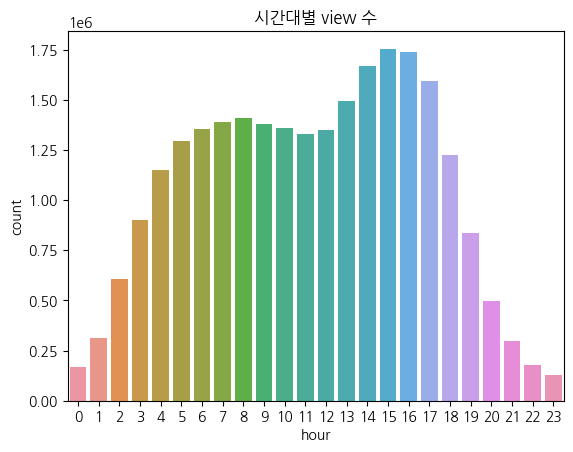

In [191]:
# 시간대별 view 수 시각화

df['hour'] = df['event_time'].dt.hour
sns.countplot(data=df[df['event_type'] == 'view'], x='hour')
plt.title('시간대별 view 수')

Text(0.5, 1.0, '시간대별 cart 수')

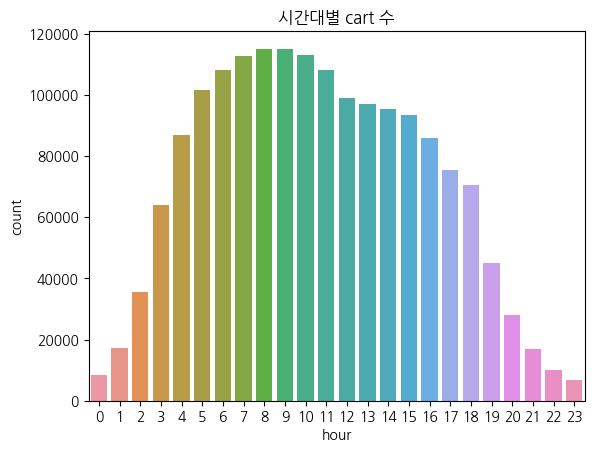

In [192]:
# 시간대별 cart 수 시각화

sns.countplot(data=df[df['event_type'] == 'cart'], x='hour')
plt.title('시간대별 cart 수')

Text(0.5, 1.0, '시간대별 purchase 수')

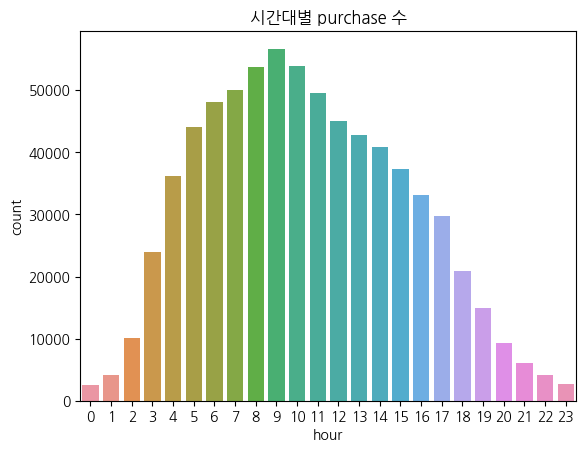

In [193]:
# 시간대별 purchase 수 시각화

sns.countplot(data=df[df['event_type'] == 'purchase'], x='hour')
plt.title('시간대별 purchase 수')

## Retention
이전에 가입한 사용자들이 다시 방문한 수

In [51]:
# Retention
# 이전에 가입한 사용자들이 다시 방문한 수

# 유입자 수 대비 view 수
retention = df.loc[df['event_type'] == 'view', 'user_id'].nunique() / acquisition
retention

0.9997666272927125

In [ ]:
# 유입자 수 대비 cart, purchase 수

In [ ]:
# veiw 수 대비 cart, purchase 수

## Revenue
총 결제 금액

In [57]:
revenue = df.loc[df['event_type'] == 'purchase', 'price'].sum()
revenue

334493463.55999994

In [125]:
# 브랜드별 결제 금액(판매액)

brand_revenue = df[df['event_type'] == 'purchase'].groupby('brand').agg({'price':'sum'}).sort_values('price', ascending=False)
brand_revenue

,price
brand,
apple,2.178121e+08
samsung,8.008368e+07
xiaomi,1.790439e+07
huawei,9.253369e+06
oppo,5.901501e+06
vivo,1.011852e+06
oneplus,7.051321e+05
meizu,4.806958e+05
sony,3.475300e+05


Text(0.5, 1.0, '브랜드별 매출')

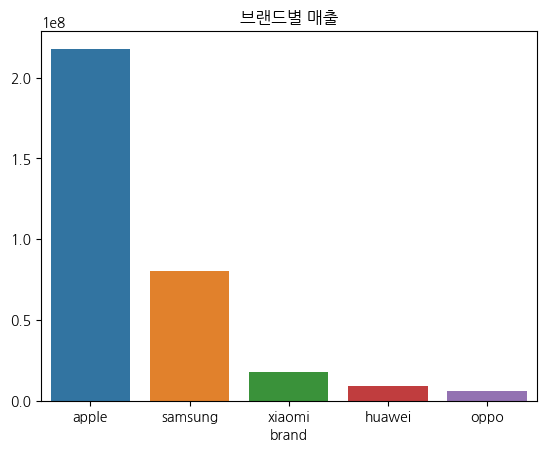

In [216]:
# 브랜드별 결제 금액(판매액) 시각화

sns.barplot(brand_revenue.iloc[:5, :].T)
plt.title('브랜드별 매출')

In [207]:
df['event_hour'] = df['event_time'].dt.hour

In [212]:
hour_revenue = df[df['event_type'] == 'purchase'].groupby('event_hour').agg({'price':'sum'})
hour_revenue

,price
event_hour,
0,1276520.37
1,1799129.87
2,4365461.84
3,10616863.86
4,16201641.87
5,20001986.13
6,21733633.42
7,22528659.24
8,24654743.03


Text(0.5, 1.0, '시간대별 매출')

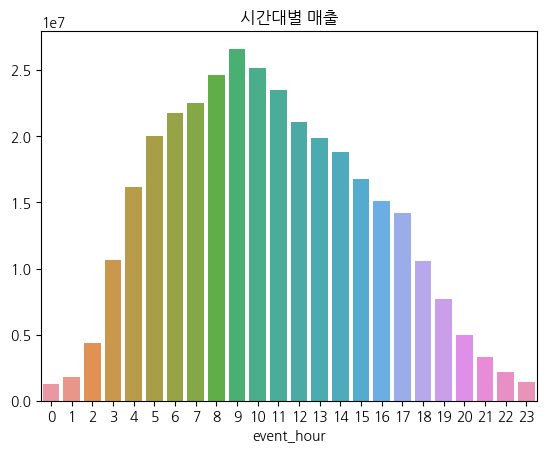

In [220]:
sns.barplot(hour_revenue.T)
plt.title('시간대별 매출')

## Referral
추천 수 (기존 사용자가 새로운 사용자 유입에 기여하는 것)

In [54]:
# Referral
# 추천 수

referral = df.loc[df['event_type'] == 'view', 'user_session'].nunique()
referral

7296964

# 리텐션 분석

## view 수 대비 cart, purchase 수

In [ ]:
# # 리텐션 분석

# 브랜드별 재구매율
# 월별 재구매율

# # 

# 가설을 어떻게 세워서 분석을 해야할까,,

In [ ]:
df['user_id'].nunique()

In [ ]:
df['user_id'].value_counts()

In [38]:
# user_id별 event_type 

et = df.pivot_table(index='user_id',
                   columns='event_type',
                   values='event_time',
                  aggfunc='count', fill_value=0).sort_values('user_id')
et

event_type,cart,purchase,view
user_id,,,
31198833,0,0,18
41798457,0,0,1
88309646,0,0,1
94566147,1,0,21
94584874,0,0,1
...,...,...,...
579968863,0,0,1
579969045,0,0,11
579969525,0,0,1


In [41]:
et['cart / view'] = et['cart'] / et['view']
et.head()

event_type,cart,purchase,view,cart/view,cart / view
user_id,,,,,
31198833,0,0,18,0.000000,0.000000
41798457,0,0,1,0.000000,0.000000
88309646,0,0,1,0.000000,0.000000
94566147,1,0,21,0.047619,0.047619
94584874,0,0,1,0.000000,0.000000


In [42]:
et['purchase / view'] = et['purchase'] / et['view']
et.head()

event_type,cart,purchase,view,cart/view,cart / view,purchase / view
user_id,,,,,,
31198833,0,0,18,0.000000,0.000000,0.0
41798457,0,0,1,0.000000,0.000000,0.0
88309646,0,0,1,0.000000,0.000000,0.0
94566147,1,0,21,0.047619,0.047619,0.0
94584874,0,0,1,0.000000,0.000000,0.0


In [45]:
et['purchase / cart'] = et['purchase'] / et['cart']
et.head()

event_type,cart,purchase,view,cart / view,purchase / view,purchase / cart
user_id,,,,,,
31198833,0,0,18,0.000000,0.0,NaN
41798457,0,0,1,0.000000,0.0,NaN
88309646,0,0,1,0.000000,0.0,NaN
94566147,1,0,21,0.047619,0.0,0.0
94584874,0,0,1,0.000000,0.0,NaN


In [48]:
et.sort_values('cart / view', ascending=False)

event_type,cart,purchase,view,cart / view,purchase / view,purchase / cart
user_id,,,,,,
518720341,2,0,0,inf,NaN,0.0
566023028,4,0,0,inf,NaN,0.0
556396381,1,0,0,inf,NaN,0.0
556623811,2,0,0,inf,NaN,0.0
577448808,6,0,0,inf,NaN,0.0
...,...,...,...,...,...,...
578763385,0,1,0,NaN,inf,inf
578766278,0,1,0,NaN,inf,inf
578792728,0,1,0,NaN,inf,inf


In [87]:
et.sample(30)

event_type,cart,purchase,view,cart / view,purchase / view,purchase / cart
user_id,,,,,,
528279270,0,0,5,0.000000,0.000000,NaN
566156164,0,0,2,0.000000,0.000000,NaN
569900623,0,0,1,0.000000,0.000000,NaN
545830244,9,2,52,0.173077,0.038462,0.222222
576072323,0,0,1,0.000000,0.000000,NaN
538245864,0,0,48,0.000000,0.000000,NaN
578253312,0,0,4,0.000000,0.000000,NaN
537623432,0,0,3,0.000000,0.000000,NaN
567372460,0,0,8,0.000000,0.000000,NaN


## 유저 수 추이

In [139]:
# 일별 유저 수

df['date'] = df['event_time'].dt.date
daily_user = df.groupby('date').agg({'user_id':'count'})



,user_id
date,
2019-10-01,336217
2019-10-02,335991
2019-10-03,330899
2019-10-04,399904
2019-10-05,362944


In [140]:
daily_user.head()

,user_id
date,
2019-10-01,336217
2019-10-02,335991
2019-10-03,330899
2019-10-04,399904
2019-10-05,362944


<AxesSubplot:xlabel='date'>

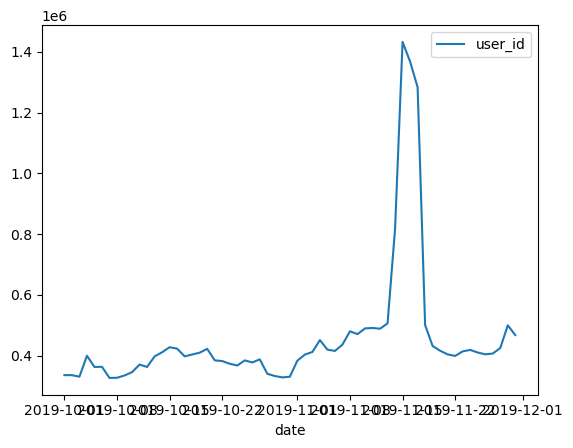

In [175]:
sns.lineplot(daily_user)

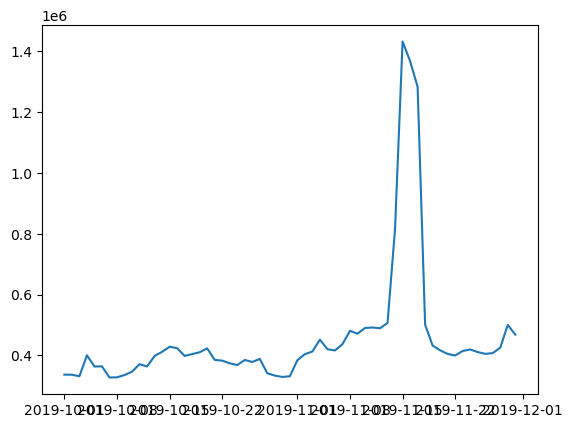

In [176]:
plt.plot(daily_user.index, daily_user.values)
# plt.title('Daily Visitor Count')
# plt.xlabel('Date')
# plt.ylabel('Visitor Count')
plt.show()

In [89]:
cohort_data = df.sample(1000).groupby(['user_id']).agg({'event_time': 'min'})
cohort_data.columns = ['cohort_start']
cohort_data.reset_index(inplace=True)
cohort_data['cohort_start'] = pd.to_datetime(cohort_data['cohort_start'])


In [91]:
df.sample(1000)['event_time'] = pd.to_datetime(df.sample(1000)['event_time'])
df.sample(1000)['event_date'] = df.sample(1000)['event_time'].dt.date
user_data = df.sample(1000).groupby(['user_id', 'event_date']).agg({'event_time': 'count'})
user_data.reset_index(inplace=True)
daily_active_users = user_data.groupby(['event_date']).agg({'user_id': pd.Series.nunique})
daily_active_users.columns = ['active_users']
daily_active_users.reset_index(inplace=True)

KeyError: 'event_date'

## 두 번 이상 구매한 사람 수

In [93]:
# 두 번 이상 구매한 사람
et[et.purchase >= 2] # 121838명

event_type,cart,purchase,view,cart / view,purchase / view,purchase / cart
user_id,,,,,,
369801696,4,3,4,1.000000,0.750000,0.750000
403013066,3,2,8,0.375000,0.250000,0.666667
403810661,4,2,9,0.444444,0.222222,0.500000
415873351,5,2,6,0.833333,0.333333,0.400000
420986446,2,2,9,0.222222,0.222222,1.000000
...,...,...,...,...,...,...
579925652,4,2,5,0.800000,0.400000,0.500000
579930581,3,2,3,1.000000,0.666667,0.666667
579938955,5,4,5,1.000000,0.800000,0.800000


In [ ]:
et[et.purchase >= 2]

In [195]:
et[et.purchase >= 1] # 321917명

# 1번 이상 구매한 사람 중 2번 이상 구매한 사람
# 121838 / 321917 *100 = 37.8 %

event_type,cart,purchase,view,cart / view,purchase / view,purchase / cart
user_id,,,,,,
299358698,1,1,12,0.083333,0.083333,1.0
304707635,2,1,2,1.000000,0.500000,0.5
307138432,1,1,1,1.000000,1.000000,1.0
315835876,1,1,1,1.000000,1.000000,1.0
366237542,1,1,2,0.500000,0.500000,1.0
...,...,...,...,...,...,...
579962593,2,1,9,0.222222,0.111111,0.5
579962677,1,1,2,0.500000,0.500000,1.0
579963523,2,1,3,0.666667,0.333333,0.5


In [197]:
121838 / 321917 *100

37.84764395791462

In [200]:
df_sample = df.sample(100000)

In [ ]:
df.sample(100).groupby('event_time').agg()

In [ ]:
# 브랜드별 두 번 이상 구매한 사람의 비율

In [206]:
df[df['event_type']=='purchase'].groupby('brand').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)

,user_id
brand,
samsung,304914
apple,242597
xiaomi,87329
huawei,43518
oppo,25971
vivo,3939
meizu,3770
honor,1254
nokia,1166


In [223]:
purchase = df[df['event_type'] == 'purchase']
purchase

,event_time,event_type,product_id,brand,price,user_id,user_session,hour,date,event_hour
162,2019-10-01 00:02:14+00:00,purchase,1004856,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,0,2019-10-01,0
308,2019-10-01 00:04:37+00:00,purchase,1002532,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,0,2019-10-01,0
618,2019-10-01 00:10:08+00:00,purchase,1002524,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,0,2019-10-01,0
860,2019-10-01 00:14:14+00:00,purchase,1004932,vivo,463.31,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562,0,2019-10-01,0
1558,2019-10-01 02:19:10+00:00,purchase,1004246,apple,736.18,515246296,b7dbae4f-cad3-463e-89ce-41990cf48dea,2,2019-10-01,2
...,...,...,...,...,...,...,...,...,...,...
67501637,2019-11-30 23:57:30+00:00,purchase,1004874,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0,23,2019-11-30,23
67501716,2019-11-30 23:58:08+00:00,purchase,1004767,samsung,235.60,574868869,878a1538-ebe3-4d7f-b773-1b057b1971eb,23,2019-11-30,23
67501725,2019-11-30 23:58:14+00:00,purchase,1004874,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0,23,2019-11-30,23
67501745,2019-11-30 23:58:22+00:00,purchase,1005130,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe,23,2019-11-30,23


In [235]:
# 브랜드별 구매자 수
purchase_1 = purchase.groupby('brand')['user_id'].nunique().reset_index(name='구매자 수')
purchase_1

,brand,구매자 수
0,apple,108195
1,asus,21
2,blackberry,16
3,bq,162
4,doogee,118
5,fly,66
6,gionee,34
7,google,38
8,haier,134
9,honor,889


In [231]:
# 브랜드별 두번 이상 구매한 사람 수

repeat_customers = df.groupby(['brand', 'user_id'])['event_type'].agg(lambda x: (x == 'purchase').sum())\
                    .reset_index(name='num_purchases').query('num_purchases >= 2')

In [232]:
num_repeat_customers = repeat_customers.groupby('brand')['user_id'].nunique().reset_index(name='num_repeat_customers')

In [242]:
# 합치기
retention = pd.merge(purchase_1, num_repeat_customers, on='brand', how='outer').fillna(0)
retention.columns = ['brand', '한 번 이상 구매자 수', '두 번 이상 구매자 수']
retention['retention(%)'] = retention['두 번 이상 구매자 수']/retention['한 번 이상 구매자 수']*100
retention.sort

,brand,한 번 이상 구매자 수,두 번 이상 구매자 수,retention(%)
0,apple,108195,41003.0,37.897315
1,asus,21,3.0,14.285714
2,blackberry,16,3.0,18.750000
3,bq,162,19.0,11.728395
4,doogee,118,18.0,15.254237
5,fly,66,7.0,10.606061
6,gionee,34,5.0,14.705882
7,google,38,9.0,23.684211
8,haier,134,20.0,14.925373
9,honor,889,173.0,19.460067


In [245]:
retention = retention.sort_values(by='retention(%)', ascending=False)

Text(0.5, 1.0, '브랜드별 재구매율(%)')

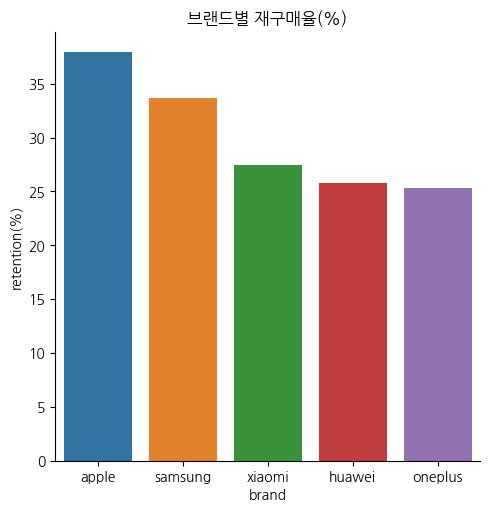

In [250]:
sns.catplot(data=retention.iloc[:5, :], x='brand', y='retention(%)', kind='bar')
plt.title('브랜드별 재구매율(%)')

## 첫 방문일, 이후 방문일 비교

In [221]:
# 유저별 첫 방문일
df.groupby('user_id').agg()['event_time'].min()

user_id
31198833    2019-11-08 02:09:45+00:00
41798457    2019-11-26 08:33:16+00:00
88309646    2019-11-11 12:39:50+00:00
94566147    2019-11-11 07:32:29+00:00
94584874    2019-11-29 14:47:32+00:00
                       ...           
579968863   2019-11-30 23:56:33+00:00
579969045   2019-11-30 23:57:19+00:00
579969525   2019-11-30 23:59:54+00:00
579969570   2019-11-30 23:58:56+00:00
579969851   2019-11-30 23:59:59+00:00
Name: event_time, Length: 2438160, dtype: datetime64[ns, UTC]

In [7]:
df['user_id'].value_counts()

512365995    9125
512505687    5180
512388419    5157
513021392    4361
568804062    3528
             ... 
556578080       1
541190141       1
572546553       1
521718155       1
579969851       1
Name: user_id, Length: 2438160, dtype: int64

In [16]:
df[df['user_id'] == 512365995].value_counts('event_type')

event_type
view    9109
cart      16
dtype: int64

In [19]:
# user_id별 event_type 

a = []
for i in df['user_id'].unique():
    b = df[df['user_id'] == i].value_counts('event_type')
    a.append(b)
    
pd.concat(a)

KeyboardInterrupt: 

In [31]:
## 값이 너무 많아서 샘플을 뽑아 진행

sample = df.sample(10000)
sample.head()

,event_time,event_type,product_id,brand,price,user_id,user_session
42255023,2019-10-31 17:32:24+00:00,view,1004856,samsung,130.99,543792510,b9e3799f-49f7-4af7-bab2-0030336fe687
34979631,2019-11-16 08:56:13+00:00,view,1004858,samsung,128.42,539345285,4a22db05-f39c-44c7-87f2-ea9995d623d9
30696207,2019-10-23 02:57:58+00:00,view,1004665,samsung,851.88,554433287,285ec149-f96b-4746-a89b-8614872d1935
28842945,2019-10-21 15:59:08+00:00,view,1004142,xiaomi,205.67,513855516,5bcc46e3-d60b-46bd-9659-f3f307b3962f
23798573,2019-11-14 07:00:14+00:00,view,1002633,apple,378.39,512948107,aa4a25fb-9a89-438c-b160-0ff2846eb8c8


In [26]:
sample['user_id'].nunique()

9884

In [27]:
sample['user_id'].value_counts()

519125256    4
512720178    3
561174161    3
512505687    3
512388419    3
            ..
564123787    1
534650957    1
514312304    1
559353327    1
565658079    1
Name: user_id, Length: 9884, dtype: int64

In [28]:
# user_id별 event_type 

a = []
for i in sample['user_id'].unique():
    b = df[df['user_id'] == i].value_counts('event_type')
    a.append(b)
    
pd.concat(a)

event_type
view        398
view         72
view          5
cart          1
purchase      1
           ... 
view         18
view         23
view         58
cart         10
purchase      3
Length: 18218, dtype: int64

In [ ]:
for i in sample

In [ ]:
유저별 구매수/view 수

In [30]:
sample.melt(id_vars='user_id', value_vars='event_type').sort_values('user_id')

,user_id,variable,value
4743,381856230,event_type,view
6018,413880650,event_type,view
5356,430099323,event_type,view
7919,431111976,event_type,view
7025,434358865,event_type,view
...,...,...,...
5841,579755022,event_type,view
2047,579763934,event_type,view
5253,579800315,event_type,cart
3528,579829784,event_type,view


In [ ]:
df.melt(id_vars='user_id', value_vars='event_type', )

In [33]:
sample.pivot_table(index='user_id',
                   columns='event_type',
                   values='event_time',
                  aggfunc='count').sort_values('user_id')

event_type,cart,purchase,view
user_id,,,
396823484,NaN,NaN,1.0
413880650,NaN,NaN,1.0
424531791,NaN,NaN,1.0
453060292,NaN,NaN,1.0
457734190,NaN,NaN,1.0
...,...,...,...
579768250,NaN,NaN,1.0
579824947,1.0,NaN,NaN
579826242,NaN,NaN,1.0


In [10]:
df.groupby('user_id').agg({'event_type':'count'})

,event_type
user_id,
31198833,18
41798457,1
88309646,1
94566147,22
94584874,1
...,...
579968863,1
579969045,11
579969525,1


In [36]:
df.pivot_table(index='user_id',
                   columns='event_type',
                   values='event_time',
                  aggfunc='count', fill_value=0).sort_values('user_id')

event_type,cart,purchase,view
user_id,,,
31198833,0,0,18
41798457,0,0,1
88309646,0,0,1
94566147,1,0,21
94584874,0,0,1
...,...,...,...
579968863,0,0,1
579969045,0,0,11
579969525,0,0,1


In [83]:
cohort_data = df.sample(1000).groupby(['user_id']).agg({'event_time': 'min', 'event_date': 'min'})
cohort_data.columns = ['cohort_start', 'cohort_date']
cohort_data.reset_index(inplace=True)
cohort_data['cohort_start'] = pd.to_datetime(cohort_data['cohort_start'])
cohort_data['cohort_date'] = pd.to_datetime(cohort_data['cohort_date'])

KeyError: "Column(s) ['event_date'] do not exist"